In [1]:
addpath ~/npl
startupJupyter

In [2]:
desktop

In [3]:
U = 3;
N = td.nTrials;
T = 500;

spikes = cell(N, U);
mask = false(N, U);
mask(1:30, 1) = true;
mask(11:40, 2) = true;
mask(22:50, 3) = true;

for i = 1:N
    for j = 1:U
        if mask(i, j)
            spikes{i, j} = randi(T, ceil(T/10), 1);
        end
    end
end

Undefined variable "td" or class "td.nTrials".


In [39]:
td = TrialData.buildEmptyWithTrialDurations(repmat(T, N, 1));

In [40]:
td = td.addSpikeArrayChannel('A', 'electrodes', 1:U, 'spikes', spikes);

In [43]:
td = td.setSpikeArrayTrialMask('A', mask)

In [44]:
td.getSpikeArrayTrialMask('A')

# Faster PSTH calculation

In [16]:
N = 50; % trials (total)
U = 4; % units
C = 3; % conditions
T = 500; % timepoints
A = 20; % amplitude
freq = 2;
tvec = (1:T) / T * 1000;
dt = 1/T;
phi = linspace(0, pi, C)';
condition_rates = A * sin(tvec.*(2*pi).*freq./1000 + phi); % c x t
biases = randn([1,1,U]) + 2*A;
rates = max(0, condition_rates + biases); % c x t x u

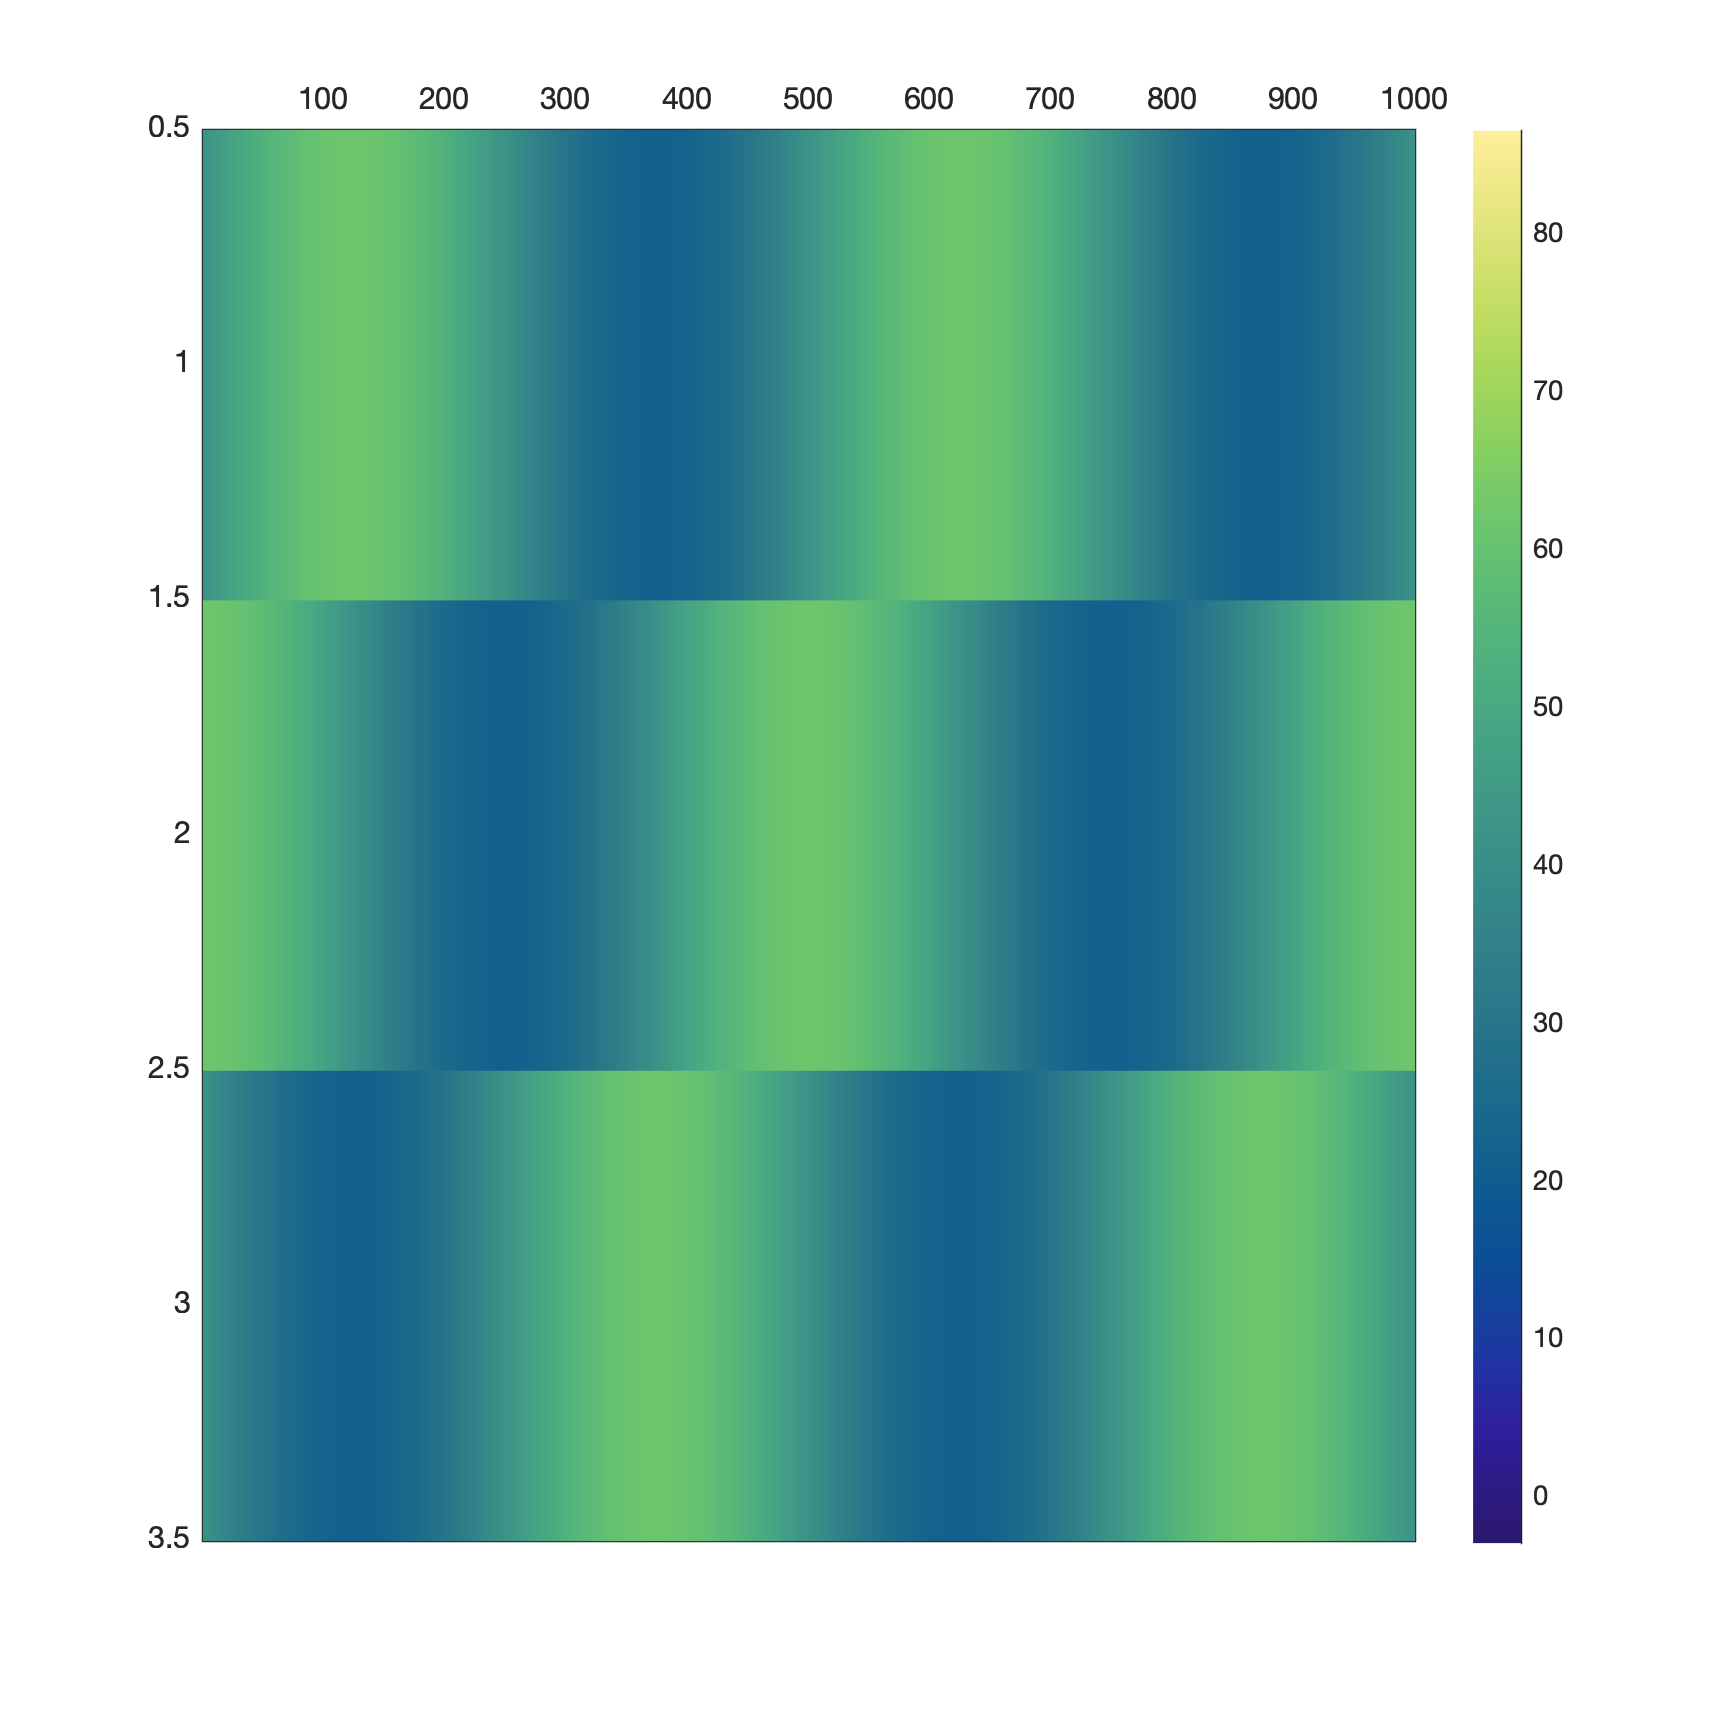

In [12]:
pmat(rates, 'x', tvec)

In [17]:
cond = randi(C, N, 1);b % which condition is each trial
spikes = cell(N, U);
for n = 1:N
    for u = 1:U
        spikes{n, u} = tvec(poissrnd(rates(cond(n), :, u) .* dt) > 0)'; 
    end
end

In [21]:
spike_RxU = spikes;
conditions = cond;
t_start_delta_stop = [1 1 500];
filterFn = @(x) normpdf(x, 0, 20);
filterWindow = [-60 60];

In [22]:
[rates, tvec] = fastPSTH(spikes_RxU, conditions, t_start_delta_stop, filterFn, filterWindow);

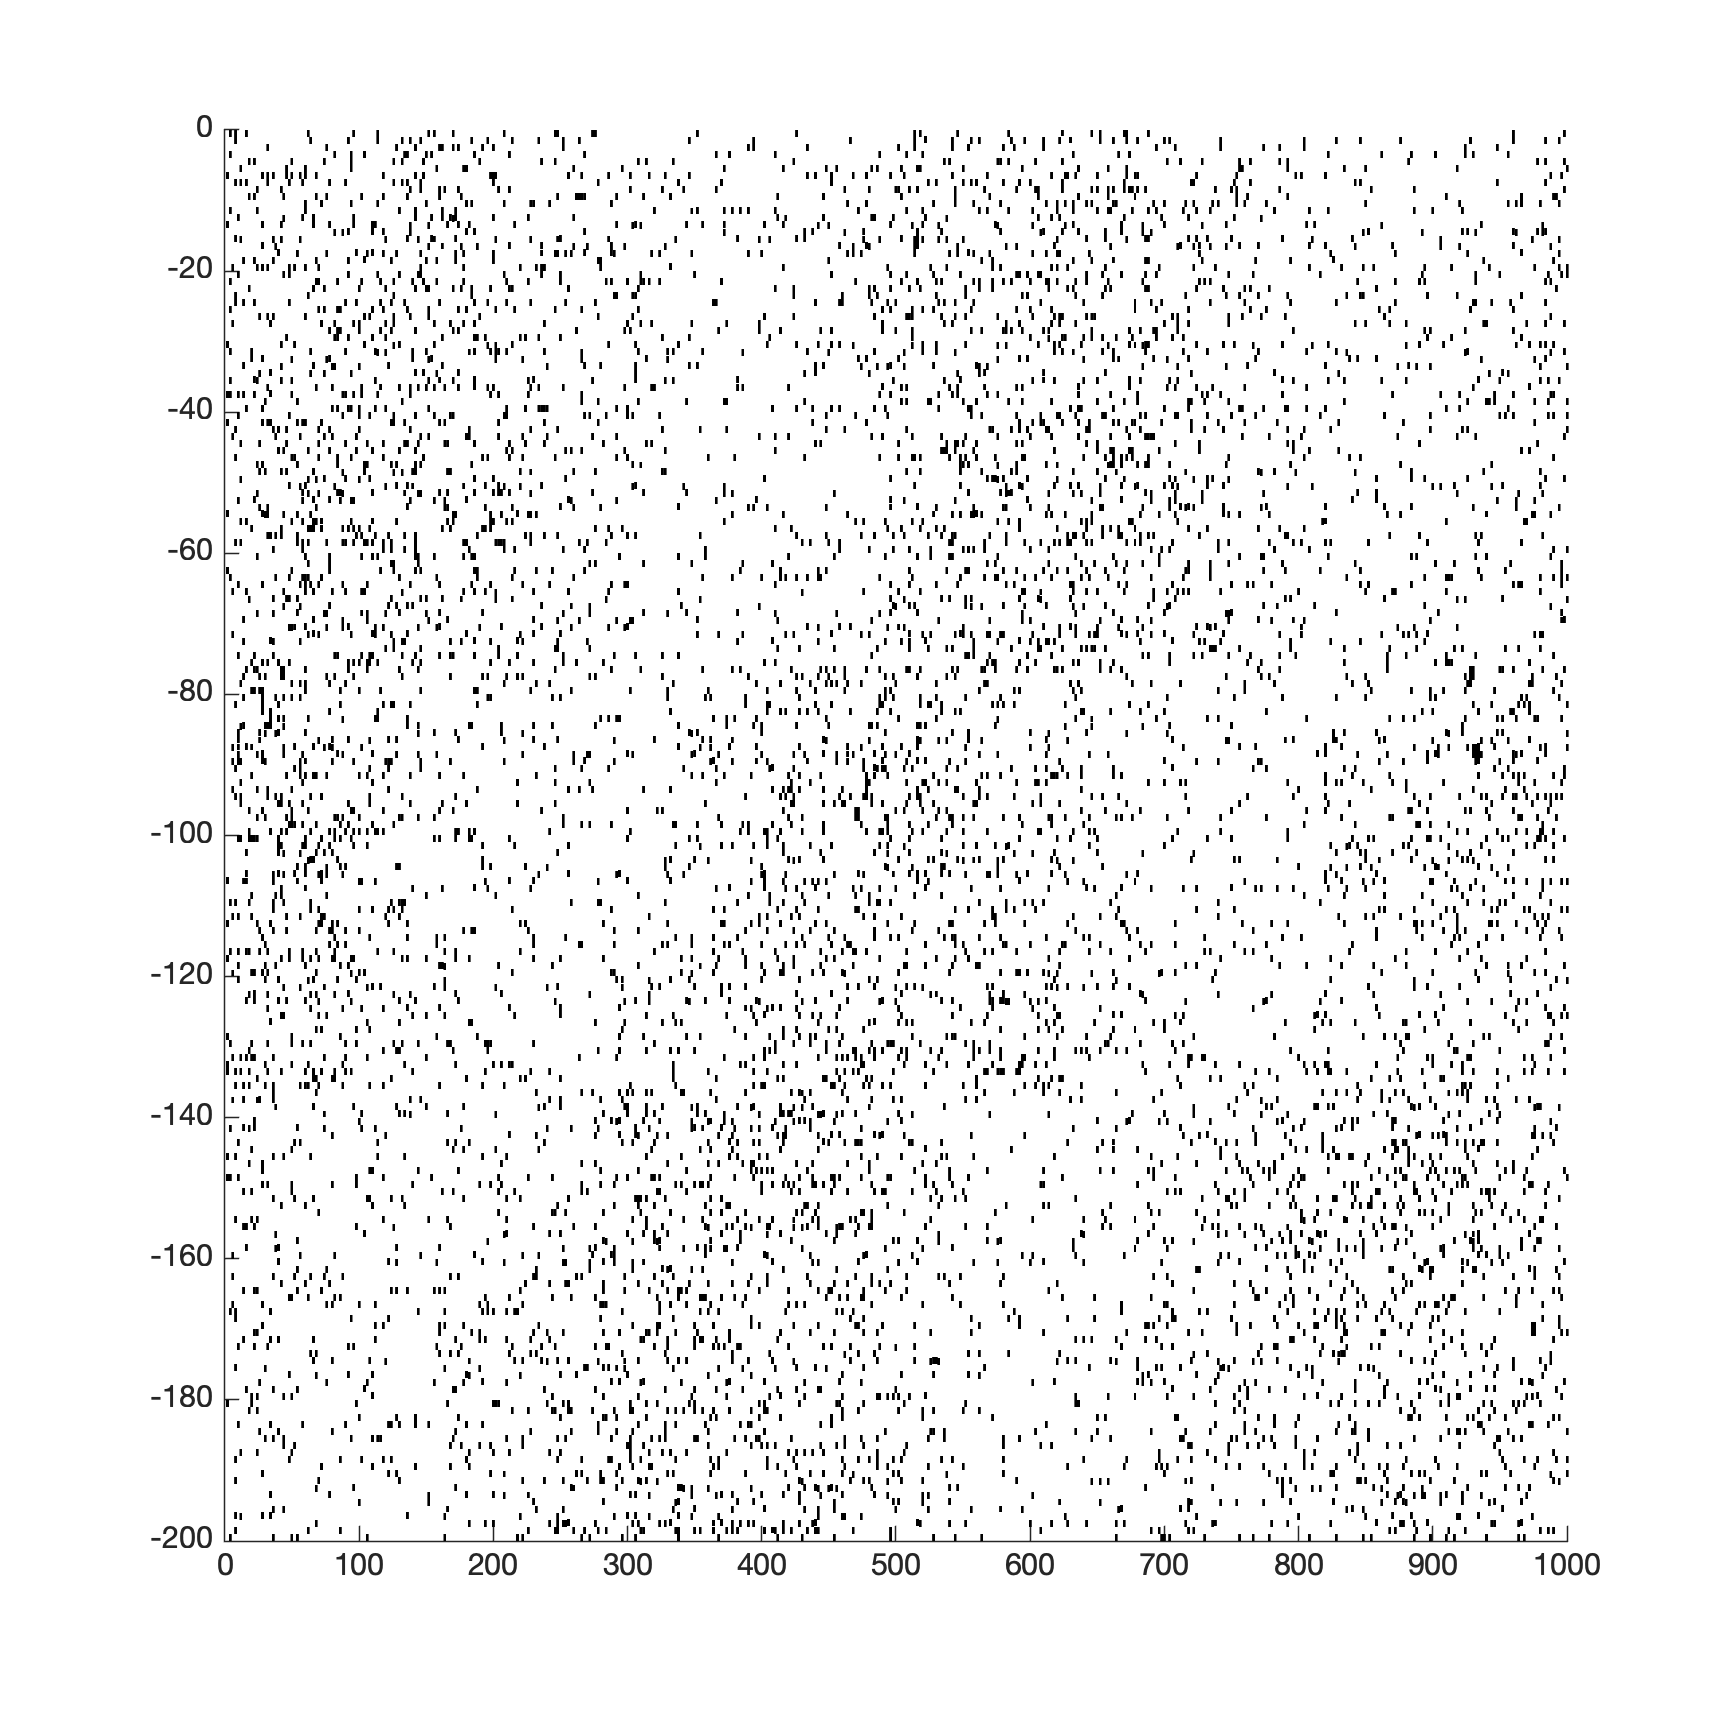

In [20]:
[~, trial_sort] = sort(cond);
TrialDataUtilities.Plotting.drawTickRaster(spikes(trial_sort, :)')

In [8]:
sf = GaussianSpikeFilter(20);